# Обработка аудио и представления для Deep Learning

Ноутбук демонстрирует базовые техники обработки аудио сигналов и преобразование их в представления, пригодные для обучения нейронных сетей.

**Цель**: изучить основные способы преобразования аудио сигналов в числовые представления (waveform, spectrogram, mel-spectrogram, MFCC) и подготовку данных для моделей.

**Темы**:
- Загрузка и визуализация аудио
- Waveform (временная область)
- Spectrogram (частотно-временное представление)
- Mel-spectrogram
- MFCC features
- Подготовка данных для моделей


## Шаг 1: Импорты и настройка


In [1]:
import torch
import torchaudio
import torchaudio.transforms as T
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"Torchaudio version: {torchaudio.__version__}")
print(f"Librosa version: {librosa.__version__}")


PyTorch version: 2.5.1+cu121
Torchaudio version: 2.5.1+cu121
Librosa version: 0.11.0


## Шаг 2: Загрузка аудио файла

Для демонстрации мы будем использовать пример аудио. Можно загрузить свой файл или использовать встроенные примеры из torchaudio.


In [2]:
SAMPLE_WAV_SPEECH_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
SAMPLE_WAV_PATH = "sample_audio.wav"

import urllib.request
urllib.request.urlretrieve(SAMPLE_WAV_SPEECH_URL, SAMPLE_WAV_PATH)

waveform, sample_rate = torchaudio.load(SAMPLE_WAV_PATH)

print(f"Waveform shape: {waveform.shape}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Duration: {waveform.shape[1] / sample_rate:.2f} seconds")
print(f"Number of channels: {waveform.shape[0]}")

if waveform.shape[0] > 1:
    waveform = waveform[0:1, :]
    print(f"Using mono channel, new shape: {waveform.shape}")


Waveform shape: torch.Size([1, 54400])
Sample rate: 16000 Hz
Duration: 3.40 seconds
Number of channels: 1


## Шаг 3: Визуализация Waveform (временная область)

Waveform показывает амплитуду сигнала во времени. Это исходное представление аудио.


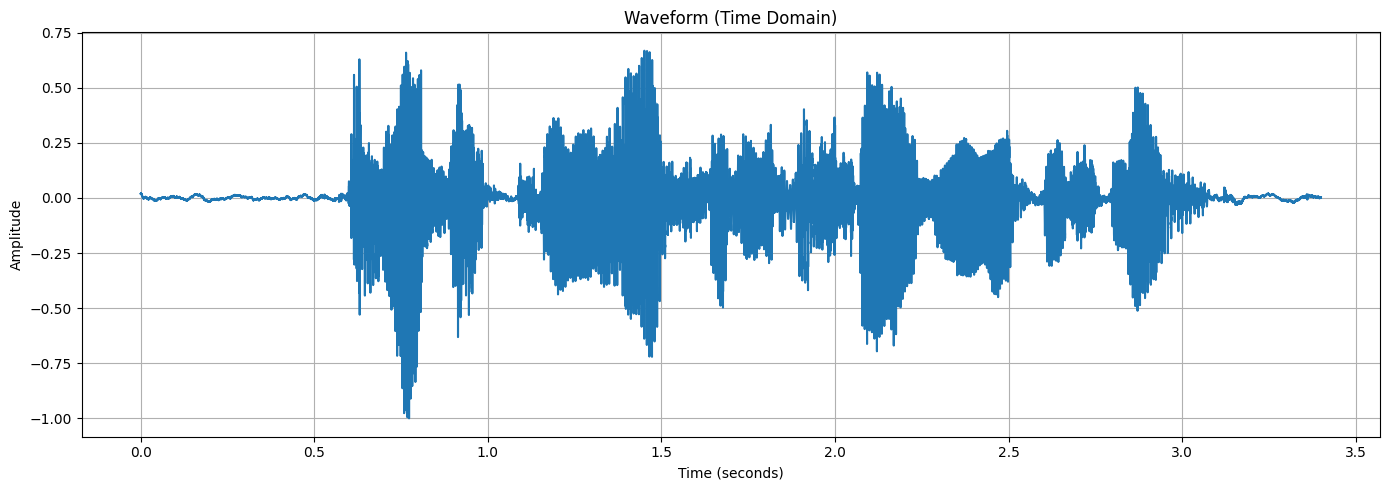

Playing audio...


In [3]:
waveform_np = waveform[0].numpy()
time_axis = np.arange(0, len(waveform_np)) / sample_rate

plt.figure(figsize=(14, 5))
plt.plot(time_axis, waveform_np)
plt.title("Waveform (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Playing audio...")
display(Audio(waveform_np, rate=sample_rate))


## Шаг 4: Spectrogram (STFT - Short-Time Fourier Transform)

Spectrogram показывает, как частоты сигнала изменяются во времени. Это частотно-временное представление, полученное с помощью STFT.


Spectrogram shape: torch.Size([1, 1025, 107])
Frequency bins: 1025
Time frames: 107


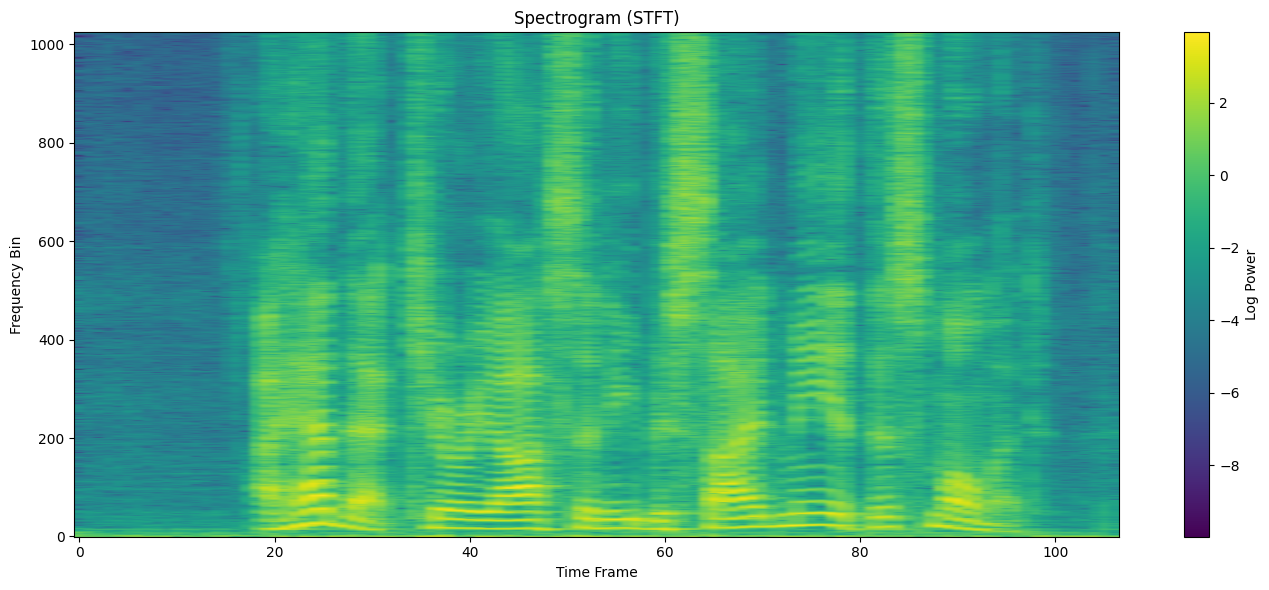

In [12]:
spectrogram_transform = T.Spectrogram(
    n_fft=2048,
    win_length=None,
    hop_length=512,
    power=2.0
)

spectrogram = spectrogram_transform(waveform)

print(f"Spectrogram shape: {spectrogram.shape}")
print(f"Frequency bins: {spectrogram.shape[1]}")
print(f"Time frames: {spectrogram.shape[2]}")

plt.figure(figsize=(14, 6))
plt.imshow(torch.log10(spectrogram[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Log Power')
plt.title("Spectrogram (STFT)")
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.tight_layout()
plt.show()


## Шаг 5: Mel-Spectrogram

Mel-spectrogram использует mel-шкалу, которая лучше соответствует восприятию звука человеком. Это одно из самых популярных представлений для аудио моделей.


Mel-Spectrogram shape: torch.Size([1, 128, 107])
Mel bins: 128
Time frames: 107


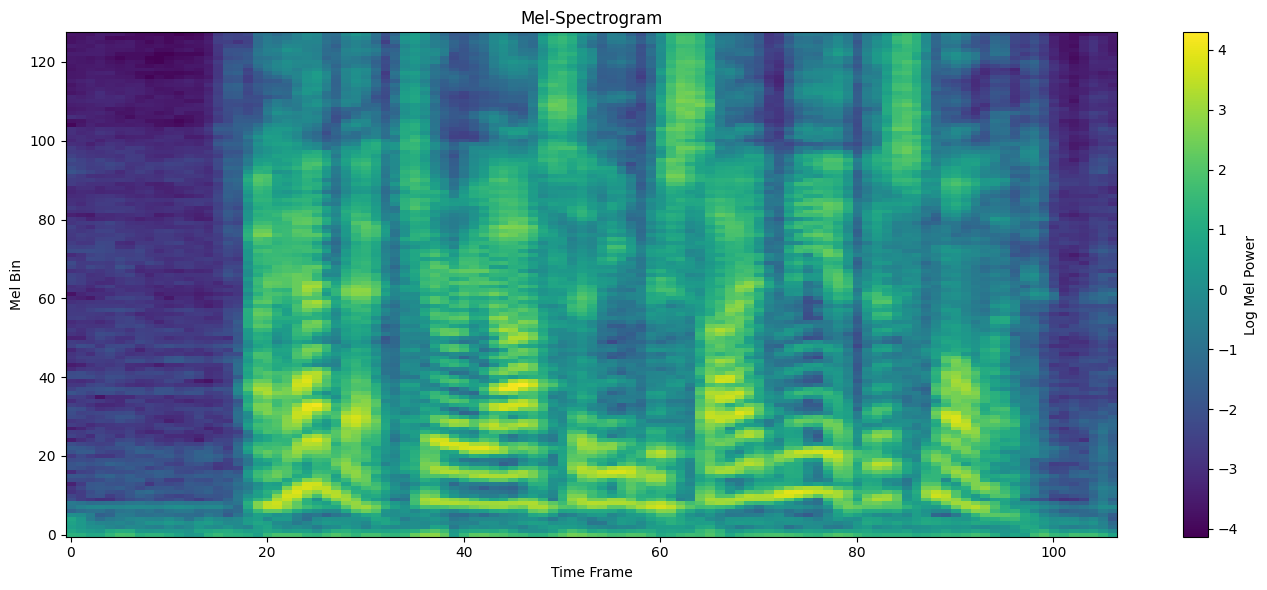

In [5]:
mel_spectrogram_transform = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=2048,
    win_length=None,
    hop_length=512,
    n_mels=128,
    f_min=0.0,
    f_max=sample_rate // 2
)

mel_spectrogram = mel_spectrogram_transform(waveform)

print(f"Mel-Spectrogram shape: {mel_spectrogram.shape}")
print(f"Mel bins: {mel_spectrogram.shape[1]}")
print(f"Time frames: {mel_spectrogram.shape[2]}")

plt.figure(figsize=(14, 6))
plt.imshow(torch.log10(mel_spectrogram[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Log Mel Power')
plt.title("Mel-Spectrogram")
plt.xlabel("Time Frame")
plt.ylabel("Mel Bin")
plt.tight_layout()
plt.show()


## Шаг 6: MFCC (Mel-Frequency Cepstral Coefficients)

MFCC - это компактное представление, извлекающее основные характеристики аудио. Широко используется в классических подходах к обработке речи.


MFCC shape: torch.Size([1, 13, 107])
MFCC coefficients: 13
Time frames: 107


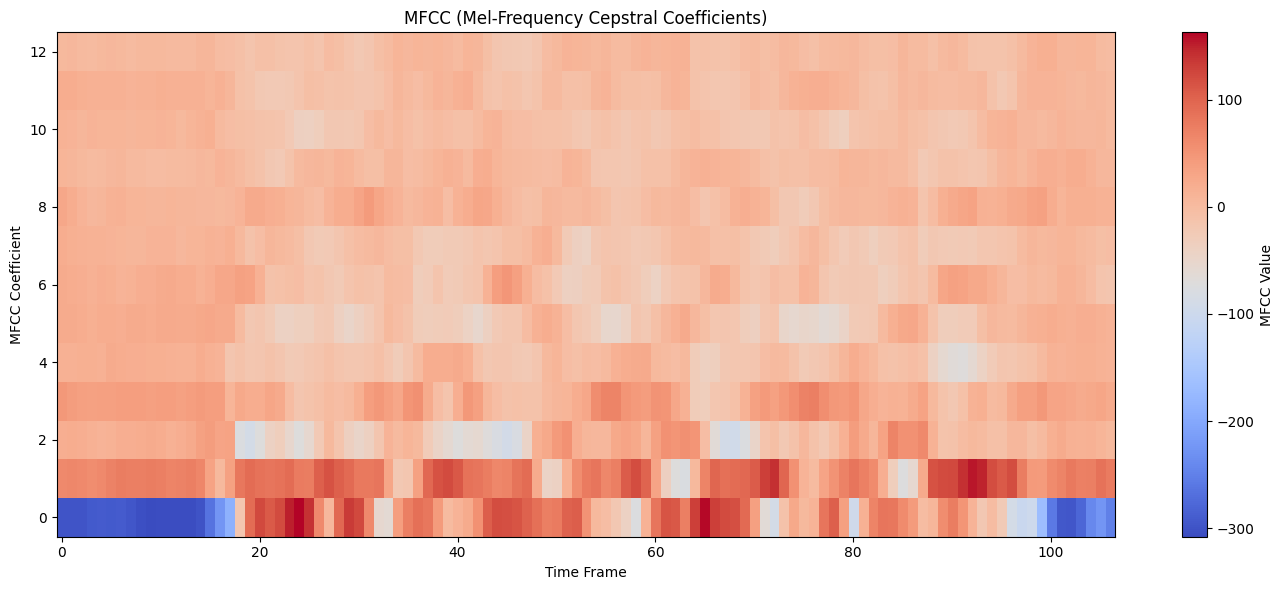

In [6]:
mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={
        'n_fft': 2048,
        'n_mels': 128,
        'hop_length': 512
    }
)

mfcc = mfcc_transform(waveform)

print(f"MFCC shape: {mfcc.shape}")
print(f"MFCC coefficients: {mfcc.shape[1]}")
print(f"Time frames: {mfcc.shape[2]}")

plt.figure(figsize=(14, 6))
plt.imshow(mfcc[0], aspect='auto', origin='lower', cmap='coolwarm')
plt.colorbar(label='MFCC Value')
plt.title("MFCC (Mel-Frequency Cepstral Coefficients)")
plt.xlabel("Time Frame")
plt.ylabel("MFCC Coefficient")
plt.tight_layout()
plt.show()


## Шаг 7: Сравнение представлений

Давайте сравним все представления на одном графике.


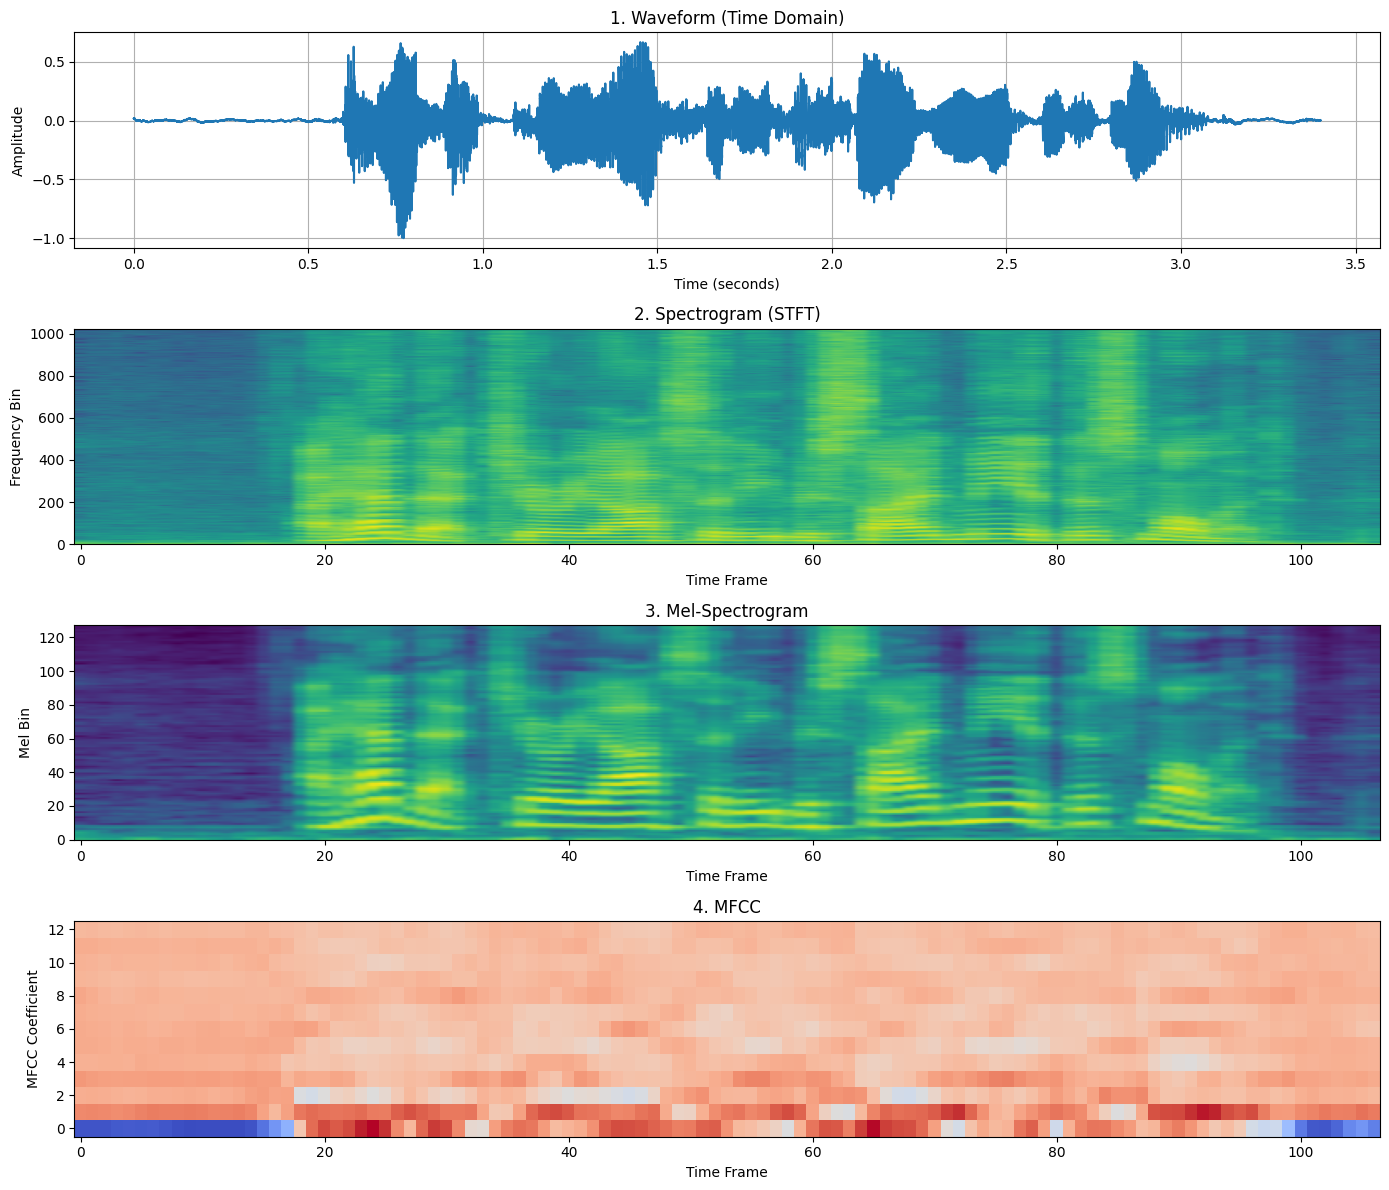

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

axes[0].plot(time_axis, waveform_np)
axes[0].set_title("1. Waveform (Time Domain)")
axes[0].set_xlabel("Time (seconds)")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)

axes[1].imshow(torch.log10(spectrogram[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
axes[1].set_title("2. Spectrogram (STFT)")
axes[1].set_xlabel("Time Frame")
axes[1].set_ylabel("Frequency Bin")

axes[2].imshow(torch.log10(mel_spectrogram[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
axes[2].set_title("3. Mel-Spectrogram")
axes[2].set_xlabel("Time Frame")
axes[2].set_ylabel("Mel Bin")

axes[3].imshow(mfcc[0], aspect='auto', origin='lower', cmap='coolwarm')
axes[3].set_title("4. MFCC")
axes[3].set_xlabel("Time Frame")
axes[3].set_ylabel("MFCC Coefficient")

plt.tight_layout()
plt.show()


## Шаг 8: Подготовка данных для моделей

Для обучения моделей нужно:
1. Нормализовать sample rate (привести к единому значению)
2. Обрезать или дополнить до фиксированной длины
3. Применить аугментации (опционально)
4. Преобразовать в нужное представление (mel-spectrogram, MFCC и т.д.)


Processed shape: torch.Size([1, 128, 157])
Expected shape: (1, 128, 157)


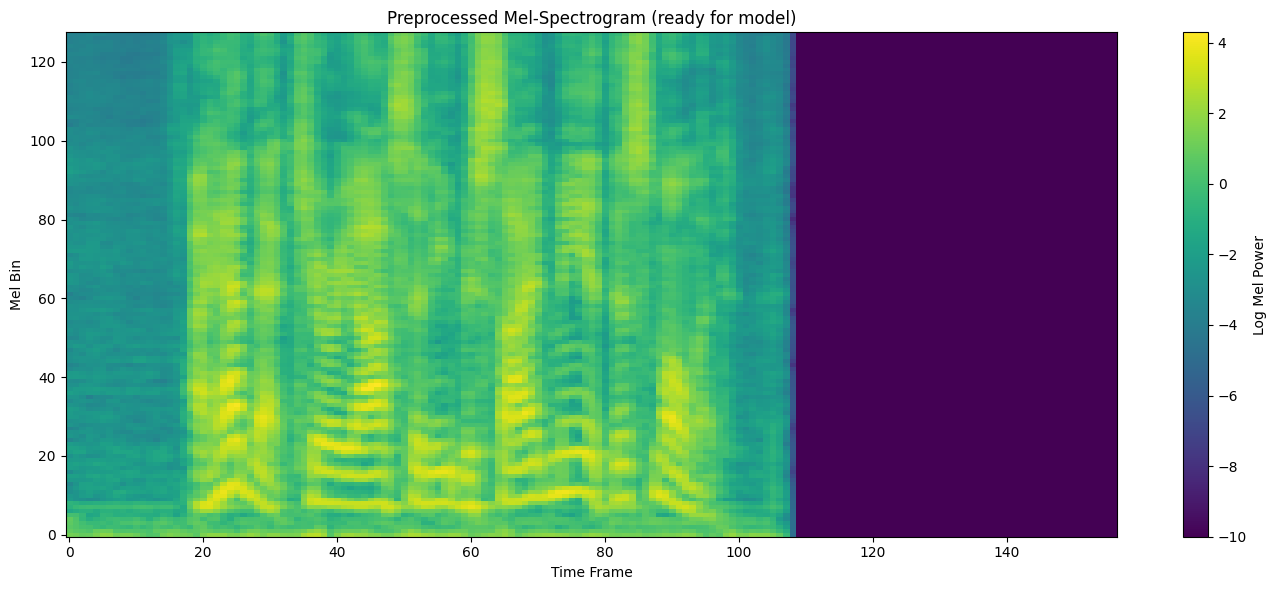

In [8]:
class AudioPreprocessor:
    """Класс для предобработки аудио для моделей"""
    
    def __init__(self, 
                 target_sample_rate=16000,
                 target_length_seconds=5.0,
                 n_mels=128,
                 n_fft=2048,
                 hop_length=512):
        self.target_sample_rate = target_sample_rate
        self.target_length = int(target_length_seconds * target_sample_rate)
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        
        self.resampler = T.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        self.mel_transform = T.MelSpectrogram(
            sample_rate=target_sample_rate,
            n_fft=n_fft,
            win_length=None,
            hop_length=hop_length,
            n_mels=n_mels,
            f_min=0.0,
            f_max=target_sample_rate // 2
        )
    
    def preprocess(self, waveform, sample_rate):
        """
        Предобработка аудио:
        1. Ресемплинг до target_sample_rate
        2. Обрезка/дополнение до target_length
        3. Преобразование в mel-spectrogram
        """
        if sample_rate != self.target_sample_rate:
            resampler = T.Resample(orig_freq=sample_rate, new_freq=self.target_sample_rate)
            waveform = resampler(waveform)
        
        current_length = waveform.shape[1]
        if current_length > self.target_length:
            start = (current_length - self.target_length) // 2
            waveform = waveform[:, start:start + self.target_length]
        elif current_length < self.target_length:
            padding = self.target_length - current_length
            waveform = torch.nn.functional.pad(waveform, (0, padding))
        
        mel_spec = self.mel_transform(waveform)
        mel_spec = torch.log10(mel_spec + 1e-10)
        
        return mel_spec
    
    def get_output_shape(self):
        """Возвращает размерность выходного представления"""
        time_frames = (self.target_length // self.hop_length) + 1
        return (1, self.n_mels, time_frames)

preprocessor = AudioPreprocessor(
    target_sample_rate=16000,
    target_length_seconds=5.0,
    n_mels=128
)

processed = preprocessor.preprocess(waveform, sample_rate)

print(f"Processed shape: {processed.shape}")
print(f"Expected shape: {preprocessor.get_output_shape()}")

plt.figure(figsize=(14, 6))
plt.imshow(processed[0], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Log Mel Power')
plt.title("Preprocessed Mel-Spectrogram (ready for model)")
plt.xlabel("Time Frame")
plt.ylabel("Mel Bin")
plt.tight_layout()
plt.show()


## Шаг 9: Аугментации аудио

Аугментации помогают улучшить обобщающую способность моделей. Популярные техники:
- Time stretching (растяжение/сжатие по времени)
- Pitch shifting (изменение тональности)
- Time masking (маскирование временных интервалов)
- Frequency masking (маскирование частотных полос)


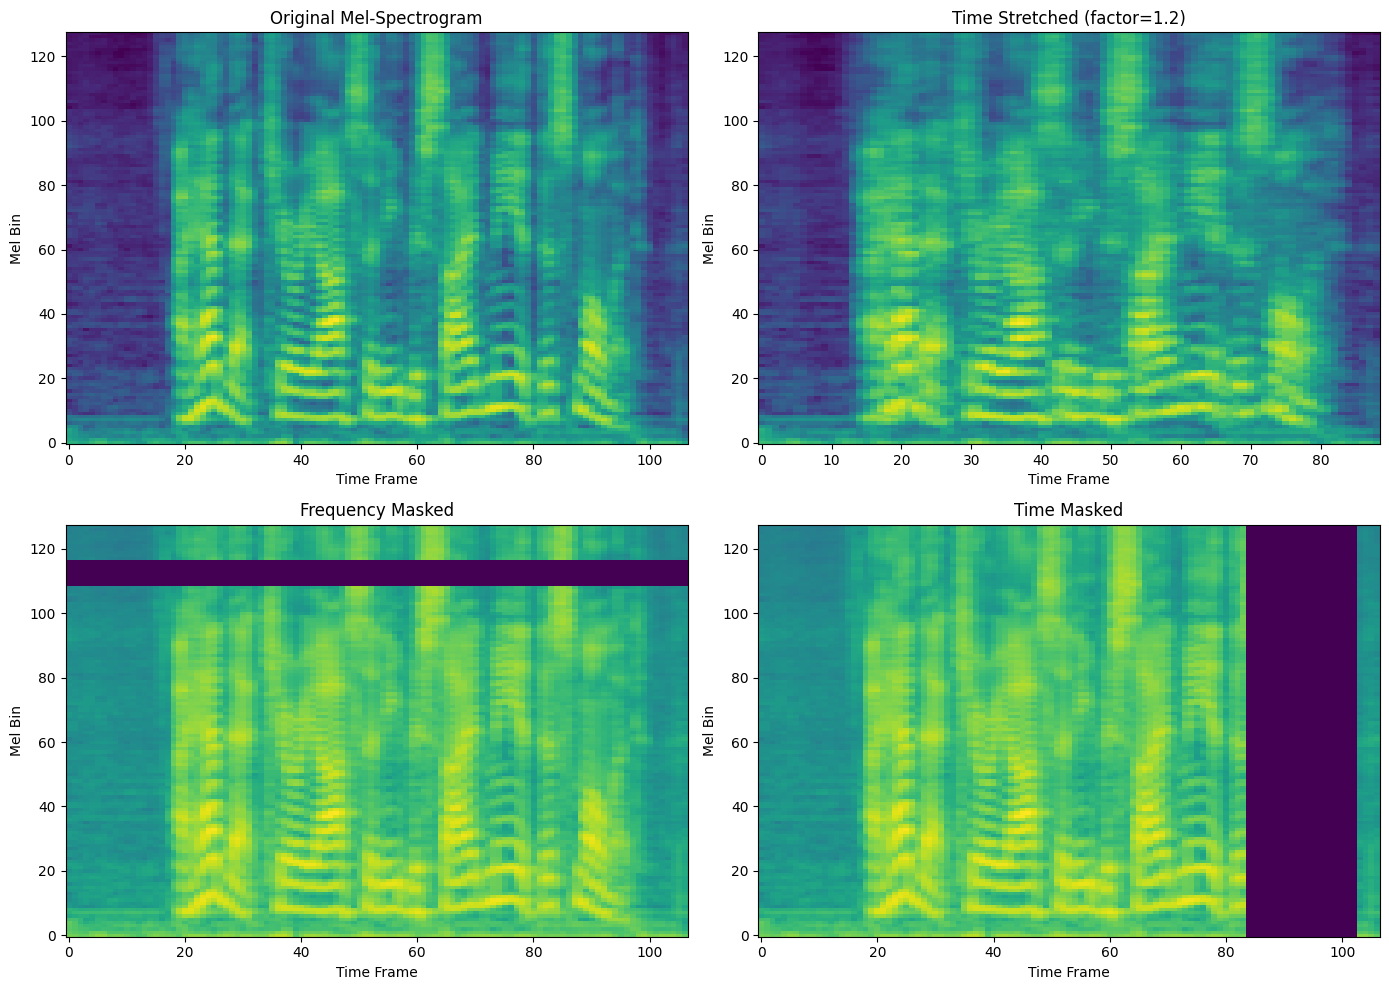

In [9]:
stretch_factor = 1.2
waveform_stretched_np = librosa.effects.time_stretch(waveform_np, rate=stretch_factor)
waveform_stretched = torch.from_numpy(waveform_stretched_np).unsqueeze(0)
stretched = mel_spectrogram_transform(waveform_stretched)
stretched = torch.log10(stretched + 1e-10)

freq_mask = T.FrequencyMasking(freq_mask_param=10)
freq_masked = freq_mask(mel_spectrogram)

time_mask = T.TimeMasking(time_mask_param=50)
time_masked = time_mask(mel_spectrogram)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].imshow(torch.log10(mel_spectrogram[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
axes[0, 0].set_title("Original Mel-Spectrogram")
axes[0, 0].set_xlabel("Time Frame")
axes[0, 0].set_ylabel("Mel Bin")

axes[0, 1].imshow(stretched[0], aspect='auto', origin='lower', cmap='viridis')
axes[0, 1].set_title(f"Time Stretched (factor={stretch_factor})")
axes[0, 1].set_xlabel("Time Frame")
axes[0, 1].set_ylabel("Mel Bin")

axes[1, 0].imshow(torch.log10(freq_masked[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
axes[1, 0].set_title("Frequency Masked")
axes[1, 0].set_xlabel("Time Frame")
axes[1, 0].set_ylabel("Mel Bin")

axes[1, 1].imshow(torch.log10(time_masked[0] + 1e-10), aspect='auto', origin='lower', cmap='viridis')
axes[1, 1].set_title("Time Masked")
axes[1, 1].set_xlabel("Time Frame")
axes[1, 1].set_ylabel("Mel Bin")

plt.tight_layout()
plt.show()


## Шаг 10: Создание Dataset класса

Пример Dataset класса для загрузки и предобработки аудио файлов.


In [10]:
from torch.utils.data import Dataset
import os

class AudioDataset(Dataset):
    """Dataset для загрузки аудио файлов"""
    
    def __init__(self, audio_files, labels=None, preprocessor=None, augment=False):
        """
        Args:
            audio_files: список путей к аудио файлам
            labels: список меток (опционально)
            preprocessor: объект AudioPreprocessor
            augment: применять ли аугментации
        """
        self.audio_files = audio_files
        self.labels = labels
        self.preprocessor = preprocessor
        self.augment = augment
        
        if augment:
            self.freq_mask = T.FrequencyMasking(freq_mask_param=10)
            self.time_mask = T.TimeMasking(time_mask_param=50)
    
    def __len__(self):
        return len(self.audio_files)
    
    def __getitem__(self, idx):
        waveform, sample_rate = torchaudio.load(self.audio_files[idx])
        
        if waveform.shape[0] > 1:
            waveform = waveform[0:1, :]
        
        if self.preprocessor:
            mel_spec = self.preprocessor.preprocess(waveform, sample_rate)
        else:
            mel_transform = T.MelSpectrogram(
                sample_rate=sample_rate,
                n_fft=2048,
                hop_length=512,
                n_mels=128
            )
            mel_spec = mel_transform(waveform)
            mel_spec = torch.log10(mel_spec + 1e-10)
        
        if self.augment:
            mel_spec = self.freq_mask(mel_spec)
            mel_spec = self.time_mask(mel_spec)
        
        if self.labels is not None:
            return mel_spec, self.labels[idx]
        return mel_spec

print("AudioDataset class created!")
print("\nExample usage:")
print("dataset = AudioDataset(audio_files=['file1.wav', 'file2.wav'],")
print("                      labels=[0, 1],")
print("                      preprocessor=preprocessor,")
print("                      augment=True)")


AudioDataset class created!

Example usage:
dataset = AudioDataset(audio_files=['file1.wav', 'file2.wav'],
                      labels=[0, 1],
                      preprocessor=preprocessor,
                      augment=True)
